***Import***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/sales_data.csv", parse_dates=["Date"])
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


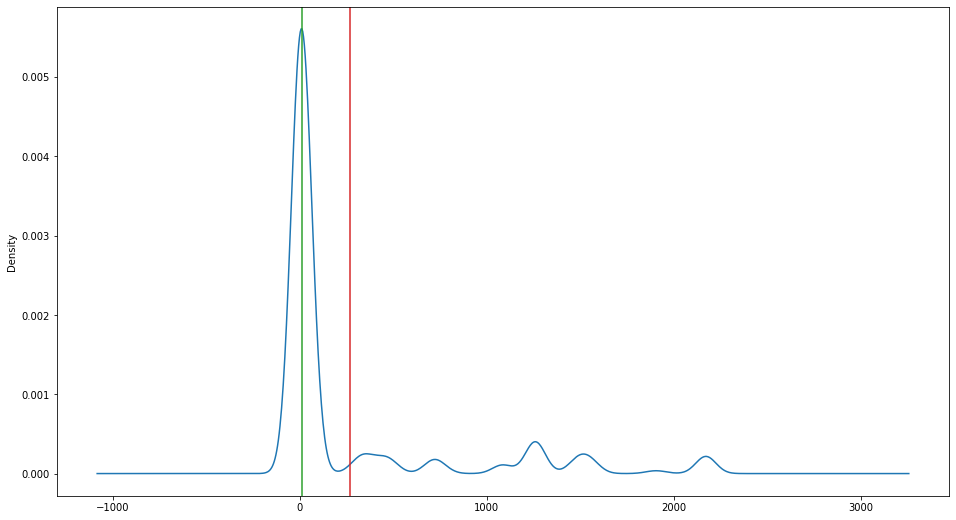

In [3]:
ax = df["Unit_Cost"].plot(kind="density", figsize=(16, 9))
ax.axvline(df["Unit_Cost"].mean(), color="tab:red")
ax.axvline(df["Unit_Cost"].median(), color="tab:green")

In [4]:
corr = df.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


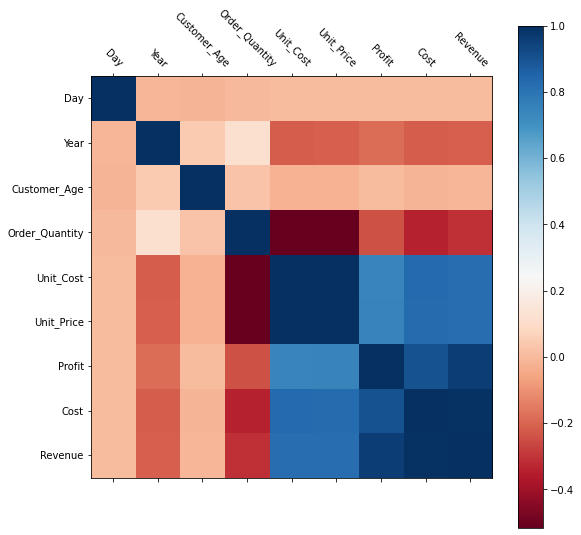

In [5]:
fig = plt.figure(figsize=(9, 9))
plt.matshow(corr, fignum=fig.number, cmap="RdBu")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=-45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()


<AxesSubplot:xlabel='Unit_Price', ylabel='Order_Quantity'>

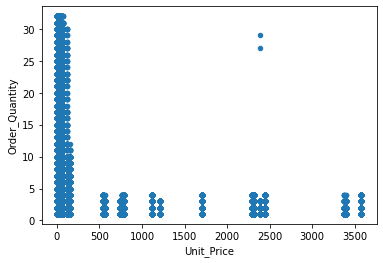

In [6]:
df.plot(kind="scatter",x="Unit_Price",y="Order_Quantity")

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

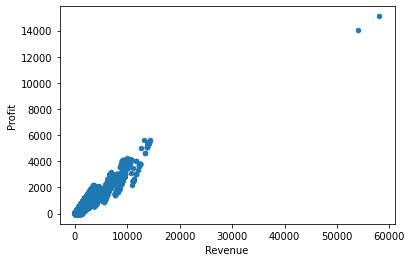

In [7]:
df.plot(kind="scatter",x="Revenue",y="Profit")

Text(0, 0.5, 'Profit')

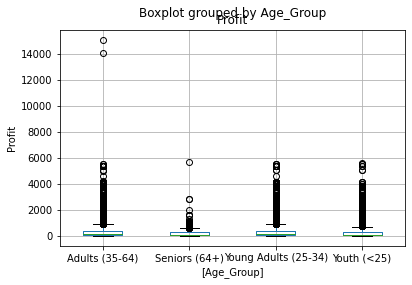

In [8]:
ax = df[["Profit","Age_Group"]].boxplot(by="Age_Group")
ax.set_ylabel("Profit")

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

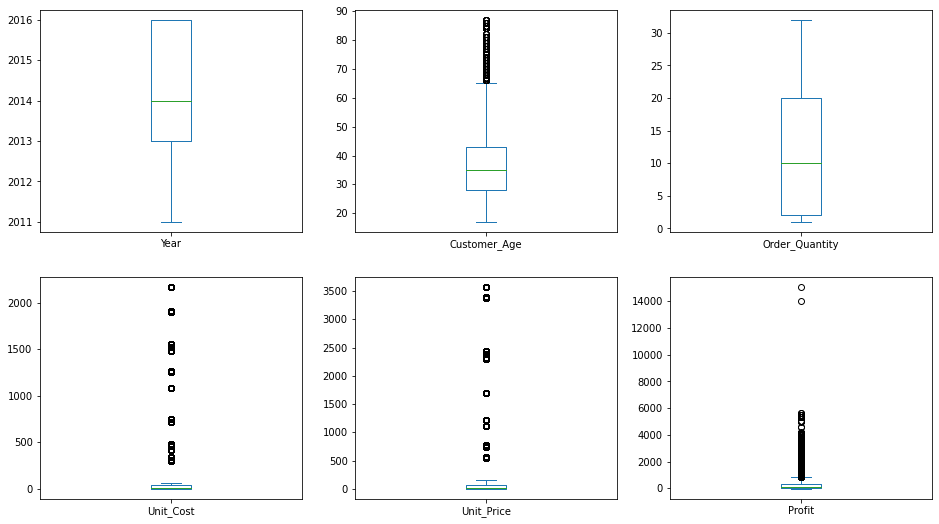

In [9]:
boxplot_cols = ["Year","Customer_Age","Order_Quantity","Unit_Cost","Unit_Price","Profit"]
df[boxplot_cols].plot(kind="box",subplots=True,layout=(2,3),figsize=(16,9))

In [10]:
df["Revenue_per_Age"] = df["Revenue"]/df["Customer_Age"]
df["Revenue_per_Age"]

0         50.000000
1         50.000000
2         49.000000
3         42.612245
4          8.893617
            ...    
113031     4.487805
113032    65.722222
113033    65.722222
113034    34.054054
113035    32.621622
Name: Revenue_per_Age, Length: 113036, dtype: float64